# EDA - GEDA
## Estancia de investigación Maestría de Ciencia de Datos
## Aide Jazmín González Cruz

### 1. Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils

### 2. Carga de datos

In [2]:
df = utils.load_df("../Data/preprocessing_data.pkl")
df

,newid,cx_curp,glucosa,colesterol,trigliceridos,hdl,ldl,presion_arterial,hba1c,plaquetas,...,hta,dm_cie,hta_cie,fecha_laboratorio,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta
0,2128MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,130/90,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,1,NaN,NaN,2003
1,31723PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,134,NaN,NaN,NaN,NaN,120/90,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,2,NaN,NaN,2004
2,41103ROGG540607PNXOCQD4,ROGG540607PNXOCQD4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,3,NaN,NaN,2004
3,46589PEVR470901ASKH1QC1,PEVR470901ASKH1QC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,4,NaN,NaN,2004
4,47454MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,5,NaN,NaN,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,6410853MAVC341201G0YJFRC1,MAVC341201G0YJFRC1,NaN,NaN,NaN,NaN,NaN,130/75,NaN,NaN,...,0.0,1.0,0.0,NaT,NaN,NaN,4458,2000.0,2010.0,2021
4995,3356716COAG580101F7ALKRC3,COAG580101F7ALKRC3,NaN,NaN,NaN,NaN,NaN,120/80,NaN,NaN,...,0.0,1.0,0.0,NaT,NaN,NaN,4459,1997.0,NaN,2021
4996,3359740PAGJ690411WZ0YDRC1,PAGJ690411WZ0YDRC1,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,4460,NaN,NaN,2021
4997,8273014MAXA480701EQOUDRC1,MAXA480701EQOUDRC1,124,NaN,NaN,NaN,NaN,110/70,NaN,NaN,...,0.0,0.0,0.0,NaT,NaN,NaN,4461,NaN,NaN,2021


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   newid                  4999 non-null   object        
 1   cx_curp                4999 non-null   object        
 2   glucosa                1228 non-null   object        
 3   colesterol             269 non-null    float64       
 4   trigliceridos          270 non-null    float64       
 5   hdl                    28 non-null     float64       
 6   ldl                    25 non-null     float64       
 7   presion_arterial       4462 non-null   object        
 8   hba1c                  82 non-null     float64       
 9   plaquetas              69 non-null     float64       
 10  creatinina             135 non-null    float64       
 11  acido_urico            82 non-null     float64       
 12  urea                   53 non-null     float64       
 13  pes

In [4]:
"""
df['sistolica']=df['sistolica'].astype(float)
df['diastolica']=df['diastolica'].astype(float)
df['hba1c'] = df['hba1c'].astype(float)
df['plaquetas'] = df['plaquetas'].astype(float)
df['creatinina'] = df['creatinina'].astype(float)
df['acido_urico'] = df['acido_urico'].astype(float)
df['tfg'] = df['tfg'].astype(float)
df['imc'] = df['imc'].astype(float)
"""

"\ndf['sistolica']=df['sistolica'].astype(float)\ndf['diastolica']=df['diastolica'].astype(float)\ndf['hba1c'] = df['hba1c'].astype(float)\ndf['plaquetas'] = df['plaquetas'].astype(float)\ndf['creatinina'] = df['creatinina'].astype(float)\ndf['acido_urico'] = df['acido_urico'].astype(float)\ndf['tfg'] = df['tfg'].astype(float)\ndf['imc'] = df['imc'].astype(float)\n"

### 3. Data profiling

- **Datos únicos por variable**

In [5]:
utils.unicos_val_by_col(df)

newid:  4999
cx_curp:  55
glucosa:  232
colesterol:  130
trigliceridos:  167
hdl:  21
ldl:  23
presion_arterial:  229
hba1c:  33
plaquetas:  61
creatinina:  25
acido_urico:  46
urea:  43
peso:  399
altura:  53
tfg:  42
imc:  75
fuente:  3
in_consulta:  4998
fecha_nacimiento:  55
sexo:  3
medicamentos:  4031
codigos_cie:  786
diagnosticos:  881
fecha_consulta:  4999
sistolica:  61
diastolica:  43
glucosa1:  227
glucosa2:  1
edad:  70
hta:  1
dm_cie:  2
hta_cie:  2
fecha_laboratorio:  264
dif_date_lab:  174
dif_date_lab_from_ini:  239
occurance_counter:  4461
año_dx_dm:  20
año_dx_hta:  13
year_consulta:  19


- **Variables numéricas**

In [6]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(25,
 array(['colesterol', 'trigliceridos', 'hdl', 'ldl', 'hba1c', 'plaquetas',
        'creatinina', 'acido_urico', 'urea', 'peso', 'altura', 'tfg',
        'imc', 'in_consulta', 'sistolica', 'diastolica', 'glucosa1',
        'glucosa2', 'edad', 'dif_date_lab', 'dif_date_lab_from_ini',
        'occurance_counter', 'año_dx_dm', 'año_dx_hta', 'year_consulta'],
       dtype=object))

In [7]:
numeric_profiling_output = {elem: utils.numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,colesterol,trigliceridos,hdl,ldl,hba1c,plaquetas,creatinina,acido_urico,urea,...,diastolica,glucosa1,glucosa2,edad,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta
0,max,351.000000,1332.000000,73.000000,171.000000,6009.000000,475000.000000,22.000000,9.500000,545.000000,...,140.000000,448.000000,NaN,87.000000,9953.000000,11637.000000,4461.000000,2018.000000,2018.000000,2021.000000
1,min,40.000000,63.000000,20.000000,22.800000,5.100000,71.000000,0.500000,2.700000,14.000000,...,1.000000,1.000000,NaN,19.000000,1.000000,0.000000,1.000000,1981.000000,1997.000000,2003.000000
2,mean,198.576580,233.381333,42.926429,106.256000,81.420610,47890.963768,1.388741,5.908415,68.280377,...,76.564097,141.856330,NaN,59.401173,319.278618,1363.195167,1991.069814,1999.532979,2005.765833,2013.155231
3,stdv,45.049836,160.549756,14.064608,38.186364,662.675585,110595.785285,2.456647,1.520544,78.451828,...,8.445338,61.678137,NaN,12.792696,821.528384,1479.125853,1399.150603,9.233903,6.677561,4.641134
4,25%,172.000000,136.000000,35.750000,88.000000,7.000000,244.000000,0.700000,4.825000,34.000000,...,70.000000,101.000000,NaN,52.000000,51.000000,310.250000,712.500000,1995.000000,1999.000000,2009.000000
5,median,199.000000,185.500000,45.000000,110.000000,8.000000,279.000000,0.900000,6.200000,46.300000,...,80.000000,124.000000,NaN,61.000000,133.000000,1112.500000,1962.000000,2001.000000,2006.000000,2013.000000
6,75%,220.000000,277.500000,49.000000,131.000000,9.475000,362.000000,1.100000,6.875000,86.000000,...,80.000000,160.000000,NaN,69.000000,242.000000,1980.000000,3211.500000,2006.000000,2012.000000,2017.000000
7,kurtosis,1.324995,13.861308,0.143351,-0.073740,81.998681,3.846110,46.479357,-0.577569,26.726602,...,9.118944,3.136683,NaN,0.114271,83.698161,14.397403,-1.272564,-0.283051,-1.483651,-1.118730
8,skewness,0.295096,2.950550,0.072661,-0.608905,9.055277,2.205642,6.539500,-0.034116,4.656673,...,-0.332620,1.571534,NaN,-0.605857,8.059084,2.886722,0.084064,-0.648595,0.079533,-0.148358
9,uniques,129.000000,166.000000,20.000000,22.000000,32.000000,60.000000,24.000000,45.000000,42.000000,...,42.000000,226.000000,0,69.000000,173.000000,238.000000,4461.000000,19.000000,12.000000,19.000000


- **Fechas**

In [8]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(3,
 array(['fecha_nacimiento', 'fecha_consulta', 'fecha_laboratorio'],
       dtype=object))

In [9]:
date_profiling_output = {elem: utils.dates_profiling(df, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,fecha_nacimiento,fecha_consulta,fecha_laboratorio
0,max,1987-04-10 00:00:00,2021-08-02 18:32:22.237000,2021-06-28 00:00:00
1,min,1933-05-01 00:00:00,2003-11-19 17:39:18.500000,2009-12-02 00:00:00
2,missings,56,0,4711
3,uniques,54,4999,263
4,top1_repeated,1963-02-13 00:00:00,2021-08-02 18:32:22.237000,2018-03-01 00:00:00
5,top2_repeated,1977-06-16 00:00:00,2011-03-11 10:18:38.663000,2020-01-01 00:00:00
6,top3_repeated,1955-03-21 00:00:00,2011-02-24 12:03:55.283000,2018-09-01 00:00:00


- **Variables categóricas**

In [10]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(4, array(['sexo', 'hta', 'dm_cie', 'hta_cie'], dtype=object))

In [11]:
category_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in category_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,sexo,hta,dm_cie,hta_cie
0,mode,"['F'] Categories (2, object): ['F', 'M']","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]","[0.0] Categories (2, float64): [0.0, 1.0]"
1,numero_categorias,2,1,2,2
2,nombres_categoria,"['M', 'F', NaN] Categories (2, object): ['M', ...","[0.0] Categories (1, float64): [0.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]","[0.0, 1.0] Categories (2, float64): [0.0, 1.0]"
3,valores_unicos,2,1,2,2
4,renglones_totales,4999,4999,4999,4999
5,faltantes_totales,56,0,0,0
6,proporcion_faltantes,1.12022,0,0,0
7,top1,F,0,0,0
8,top2,M,1,1,1
9,top3,undefined,undefined,undefined,undefined


- **Strings**

In [12]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(8,
 array(['newid', 'cx_curp', 'glucosa', 'presion_arterial', 'fuente',
        'medicamentos', 'codigos_cie', 'diagnosticos'], dtype=object))

In [13]:
string_profiling_output = {elem: utils.string_profiling(df, elem)\
                             for elem in string_variables}

df_string_profiling = pd.DataFrame(string_profiling_output).reset_index()
df_string_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_string_profiling

,metric,newid,cx_curp,glucosa,presion_arterial,fuente,medicamentos,codigos_cie,diagnosticos
0,mode,"[1000536SOLG360601I3NUBIA1, 1003096DIRL630201M...",[DIRL630201M8ADARC1],[120],[120/80],[corhis_somatometria],"[CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CA...",[E119],[Diabetes tipo II]
1,uniques,4999,55,231,228,3,4030,785,880
2,missings,0,0,3771,537,0,670,3033,3033
3,average lenght,24.7149,18,2.95379,5.68474,26.4323,843.801,5.74875,31.2967
4,max lenght,25,18,5,7,38,26962,39,251
5,min lenght,22,18,1,3,18,3,3,3
6,top1_repeated,999802LOVM470206XDKAIMD2,DIRL630201M8ADARC1,120,120/80,corhis_somatometria,"CAPTOPRIL, TABLETAS CADA TABLETA CONTIENE: CAP...",E119,Diabetes tipo II
7,top2_repeated,2332965MACL740410NK1YGRC2,CAAJ770616UNX3HRC2,nan,120/70,corhis_somatometria/exphis_hc_diabetes,GLIBENCLAMIDA TABLETAS. CADA TABLETA CONTIENE:...,"E119,I10X",Diabetes mellitus no insulinodependiente sin c...
8,top3_repeated,2325821OOCG680408JBU4ERC2,ZEPL5503219FZQ6QC2,100,110/70,exphis_hc_diabetes,INSULINA HUMANA. SUSPENSION INYECTABLE. ACCION...,Z713,Diabetes de edad adulta


### 4. EDA

Creando data frame auxiliar para ver proporciones de datos

In [14]:
df_aux = df.copy()
df_aux['sexo_n'] = ""
df_aux['edad_c'] = ""

for i in range(len(df_aux['newid'])):  
    
    if pd.isna(df_aux['glucosa1'][i]):        
        df_aux['glucosa1'][i] = 'NaN'        
    else:        
        df_aux['glucosa1'][i] = 'Value'
        
    if pd.isna(df_aux['glucosa2'][i]):
        df_aux['glucosa2'][i] = 'NaN'        
    else:        
        df_aux['glucosa2'][i] = 'Value'
    
    if pd.isna(df_aux['sistolica'][i]):        
        df_aux['sistolica'][i] = 'NaN'        
    else:        
        df_aux['sistolica'][i] = 'Value'
        
    if pd.isna(df_aux['diastolica'][i]):
        df_aux['diastolica'][i] = 'NaN'        
    else:        
        df_aux['diastolica'][i] = 'Value'
    
    if pd.isna(df_aux['colesterol'][i]):        
        df_aux['colesterol'][i] = 'NaN'        
    else:        
        df_aux['colesterol'][i] = 'Value'
        
    if pd.isna(df_aux['trigliceridos'][i]):
        df_aux['trigliceridos'][i] = 'NaN'        
    else:        
        df_aux['trigliceridos'][i] = 'Value'
        
    if pd.isna(df_aux['hdl'][i]):        
        df_aux['hdl'][i] = 'NaN'        
    else:        
        df_aux['hdl'][i] = 'Value'
        
    if pd.isna(df_aux['ldl'][i]):
        df_aux['ldl'][i] = 'NaN'        
    else:        
        df_aux['ldl'][i] = 'Value'
    
    if pd.isna(df_aux['hba1c'][i]):        
        df_aux['hba1c'][i] = 'NaN'        
    else:        
        df_aux['hba1c'][i] = 'Value'
        
    if pd.isna(df_aux['plaquetas'][i]):
        df_aux['plaquetas'][i] = 'NaN'        
    else:        
        df_aux['plaquetas'][i] = 'Value'
    
    if pd.isna(df_aux['creatinina'][i]):        
        df_aux['creatinina'][i] = 'NaN'        
    else:        
        df_aux['creatinina'][i] = 'Value'

    if pd.isna(df_aux['acido_urico'][i]):
        df_aux['acido_urico'][i] = 'NaN'        
    else:        
        df_aux['acido_urico'][i] = 'Value'
    
    if pd.isna(df_aux['urea'][i]):        
        df_aux['urea'][i] = 'NaN'        
    else:        
        df_aux['urea'][i] = 'Value'
        
    if pd.isna(df_aux['peso'][i]):
        df_aux['peso'][i] = 'NaN'        
    else:        
        df_aux['peso'][i] = 'Value'
    
    if pd.isna(df_aux['altura'][i]):        
        df_aux['altura'][i] = 'NaN'        
    else:        
        df_aux['altura'][i] = 'Value'
        
    if pd.isna(df_aux['tfg'][i]):
        df_aux['tfg'][i] = 'NaN'        
    else:        
        df_aux['tfg'][i] = 'Value'
  
    if pd.isna(df_aux['imc'][i]):        
        df_aux['imc'][i] = 'NaN'        
    else:        
        df_aux['imc'][i] = 'Value'
        
    #if pd.isna(df_aux['año_de_diagnostico_diabetes'][i]):
    #    df_aux['año_de_diagnostico_diabetes'][i] = 'NaN'        
    #else:        
    #    df_aux['año_de_diagnostico_diabetes'][i] = 'Value'
    
    #if pd.isna(df_aux['año_de_diagnostico_hipertension'][i]):        
    #    df_aux['año_de_diagnostico_hipertension'][i] = 'NaN'        
    #else:        
    #    df_aux['año_de_diagnostico_hipertension'][i] = 'Value'
        
    #if pd.isna(df_aux['fechas_procesadas2'][i]):
    #    df_aux['fechas_procesadas2'][i] = 'NaN'        
    #else:        
    #    df_aux['fechas_procesadas2'][i] = 'Value'
    
    #if pd.isna(df_aux['bandera_fechas_procesadas'][i]):        
    #    df_aux['bandera_fechas_procesadas'][i] = 'NaN'        
    #else:        
    #    df_aux['bandera_fechas_procesadas'][i] = 'Value'
        
    if pd.isna(df_aux['in_consulta'][i]):
        df_aux['in_consulta'][i] = 'NaN'        
    else:        
        df_aux['in_consulta'][i] = 'Value'
            
    if pd.isna(df_aux['fecha_nacimiento'][i]):        
        df_aux['fecha_nacimiento'][i] = 'NaN'        
    else:        
        df_aux['fecha_nacimiento'][i] = 'Value'
        
    if pd.isna(df_aux['sexo'][i]):
        df_aux['sexo_n'][i] = 'NaN'        
    else:        
        df_aux['sexo_n'][i] = 'Value'
        
    if pd.isna(df_aux['edad'][i]):
        df_aux['edad_c'][i] = 'NaN'        
    else:        
        df_aux['edad_c'][i] = 'Value'
    """
    if pd.isna(df_aux['hta'][i]):
        df_aux['hta'][i] = 'NaN'        
    else:        
        df_aux['hta'][i] = 'Value'
        
    if pd.isna(df_aux['dm_cie'][i]):
        df_aux['dm_cie'][i] = 'NaN'        
    else:        
        df_aux['dm_cie'][i] = 'Value'
        
    if pd.isna(df_aux['hta_cie'][i]):
        df_aux['hta_cie'][i] = 'NaN'        
    else:        
        df_aux['hta_cie'][i] = 'Value'
    """    
        
    if pd.isna(df_aux['año_dx_dm'][i]):
        df_aux['año_dx_dm'][i] = 'NaN'        
    else:        
        df_aux['año_dx_dm'][i] = 'Value'
    
    if pd.isna(df_aux['año_dx_hta'][i]):        
        df_aux['año_dx_hta'][i] = 'NaN'        
    else:        
        df_aux['año_dx_hta'][i] = 'Value'
    
    if pd.isna(df_aux['year_consulta'][i]):        
        df_aux['year_consulta'][i] = 'NaN'        
    else:        
        df_aux['year_consulta'][i] = 'Value'
    
prop_g1 = df_aux.groupby(['glucosa1'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['glucosa2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['sistolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['diastolica'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['colesterol'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['trigliceridos'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hdl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['ldl'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['hba1c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['plaquetas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['creatinina'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['acido_urico'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['urea'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['peso'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['altura'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['tfg'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['imc'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

#prop_g2 = df_aux.groupby(['año_de_diagnostico_diabetes'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
#display(prop_g2.sort_values(by = ['prop'], ascending = False))

#prop_g1 = df_aux.groupby(['año_de_diagnostico_hipertension'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
#display(prop_g1.sort_values(by = ['prop'], ascending = False))

#prop_g2 = df_aux.groupby(['fechas_procesadas2'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
#display(prop_g2.sort_values(by = ['prop'], ascending = False))

#prop_g1 = df_aux.groupby(['bandera_fechas_procesadas'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
#prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
#display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['in_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['fecha_nacimiento'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['sexo_n'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['edad_c'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['dm_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g2 = df_aux.groupby(['hta_cie'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))
                      
prop_g2 = df_aux.groupby(['año_dx_dm'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g2['prop'] = prop_g2['count']/np.sum(prop_g2['count'])
display(prop_g2.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['año_dx_hta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

prop_g1 = df_aux.groupby(['year_consulta'], as_index=False)['newid'].count().rename(columns={'newid': 'count'})
prop_g1['prop'] = prop_g1['count']/np.sum(prop_g1['count'])
display(prop_g1.sort_values(by = ['prop'], ascending = False))

,glucosa1,count,prop
0,NaN,3821,0.764506
1,Value,1177,0.235494


,glucosa2,count,prop


,sistolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,diastolica,count,prop
1,Value,4462,0.892579
0,NaN,537,0.107421


,colesterol,count,prop
0,NaN,3755,0.933151
1,Value,269,0.066849


,trigliceridos,count,prop
0,NaN,3754,0.932903
1,Value,270,0.067097


,hdl,count,prop
0,NaN,3502,0.992068
1,Value,28,0.007932


,ldl,count,prop
0,NaN,3505,0.992918
1,Value,25,0.007082


,hba1c,count,prop
0,NaN,3589,0.977663
1,Value,82,0.022337


,plaquetas,count,prop
0,NaN,3640,0.981397
1,Value,69,0.018603


,creatinina,count,prop
0,NaN,3568,0.963543
1,Value,135,0.036457


,acido_urico,count,prop
0,NaN,3627,0.977892
1,Value,82,0.022108


,urea,count,prop
0,NaN,3167,0.98354
1,Value,53,0.01646


,peso,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,altura,count,prop
1,Value,4791,0.958392
0,NaN,208,0.041608


,tfg,count,prop
0,NaN,3158,0.980745
1,Value,62,0.019255


,imc,count,prop
0,NaN,3575,0.971731
1,Value,104,0.028269


,in_consulta,count,prop
0,Value,4999,1.0


,fecha_nacimiento,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,sexo_n,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,edad_c,count,prop
1,Value,4943,0.988798
0,NaN,56,0.011202


,hta,count,prop
0,0.0,4999,1.0
1,1.0,0,0.0


,dm_cie,count,prop
0,0.0,3153,0.630726
1,1.0,1846,0.369274


,hta_cie,count,prop
0,0.0,4291,0.858372
1,1.0,708,0.141628


,año_dx_dm,count,prop
0,NaN,2730,0.547204
1,Value,2259,0.452796


,año_dx_hta,count,prop
0,NaN,3789,0.759471
1,Value,1200,0.240529


,year_consulta,count,prop
0,Value,4999,1.0


### 5. GEDA

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib

- **¿Qué proporción de datos vacios se tienen por vaiable?**

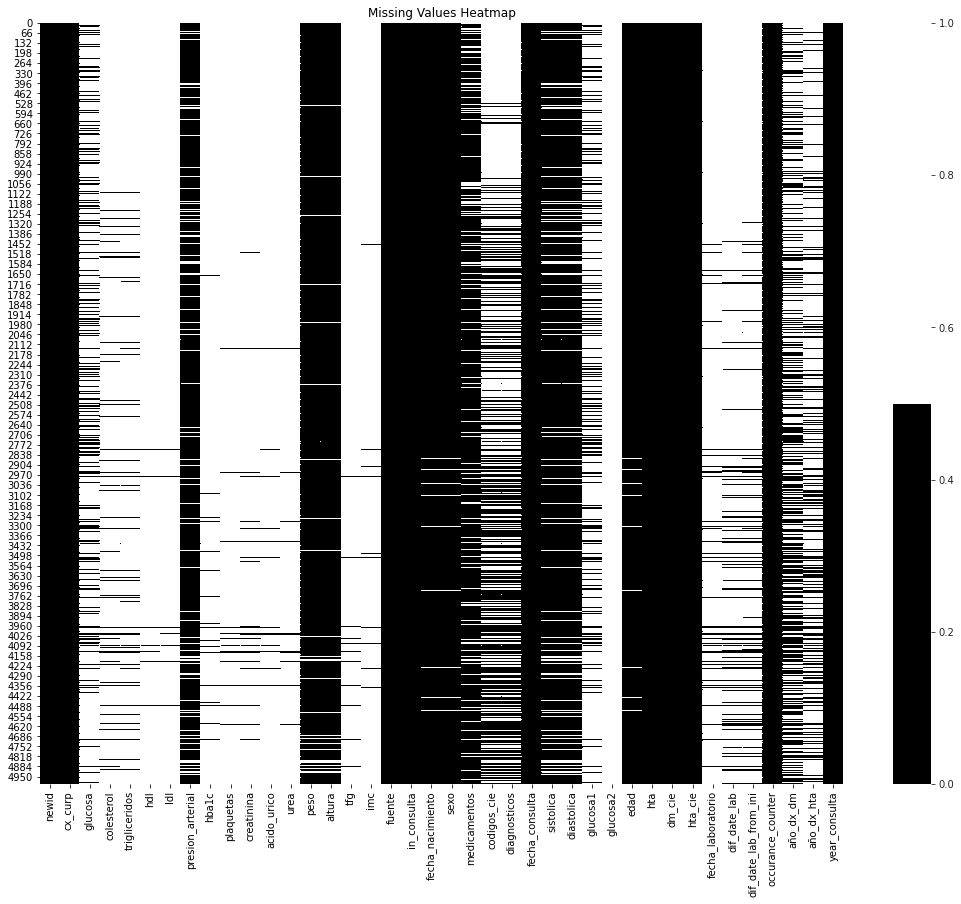

In [16]:
cols = df.columns 
colours = ["#000000","#FFFFFF"]
f, ax = plt.subplots(figsize = (18,14))
sns.set_style("whitegrid")
plt.title('Missing Values Heatmap', )
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours));

**Distribución de las variables númericas**

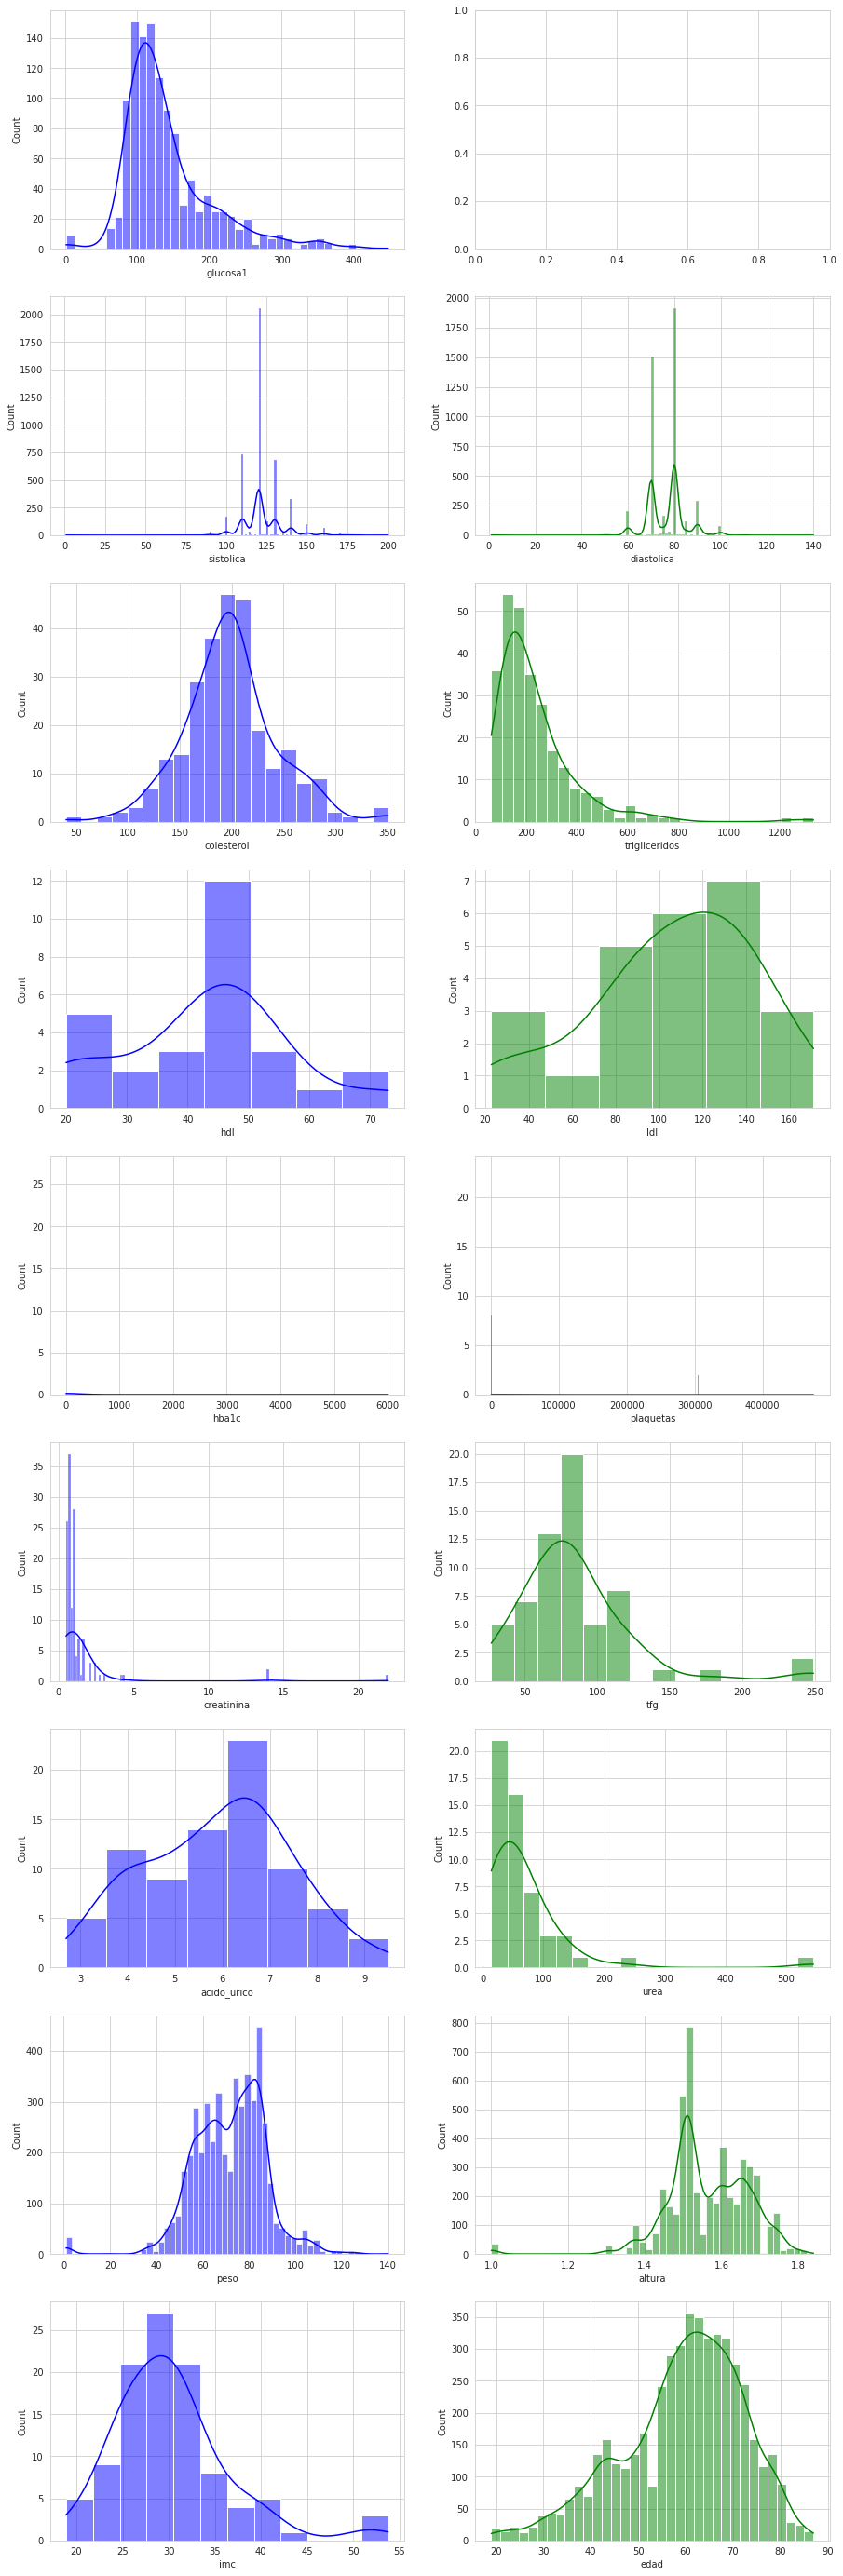

In [18]:
fig, axs = plt.subplots(9, 2, figsize=(15, 50))

sns.histplot(data = df, x="glucosa1", kde=True, color="blue", ax=axs[0,0])
sns.histplot(data = df, x="glucosa2", kde=True, color="green", ax=axs[0,1])
sns.histplot(data = df, x="sistolica", kde=True, color="blue", ax=axs[1,0])
sns.histplot(data = df, x="diastolica", kde=True, color="green", ax=axs[1,1])
sns.histplot(data = df, x="colesterol", kde=True, color="blue", ax=axs[2,0])
sns.histplot(data = df, x="trigliceridos", kde=True, color="green", ax=axs[2,1])
sns.histplot(data = df, x="hdl", kde=True, color="blue", ax=axs[3,0])
sns.histplot(data = df, x="ldl", kde=True, color="green", ax=axs[3,1])
sns.histplot(data = df, x="hba1c", kde=True, color="blue", ax=axs[4,0])
sns.histplot(data = df, x="plaquetas", kde=True, color="green", ax=axs[4,1])
sns.histplot(data = df, x="creatinina", kde=True, color="blue", ax=axs[5,0])
sns.histplot(data = df, x="tfg", kde=True, color="green", ax=axs[5,1])
sns.histplot(data = df, x="acido_urico", kde=True, color="blue", ax=axs[6,0])
sns.histplot(data = df, x="urea", kde=True, color="green", ax=axs[6,1])
sns.histplot(data = df, x="peso", kde=True, color="blue", ax=axs[7,0])
sns.histplot(data = df, x="altura", kde=True, color="green", ax=axs[7,1])
sns.histplot(data = df, x="imc", kde=True, color="blue", ax=axs[8,0])
sns.histplot(data = df, x="edad", kde=True, color="green", ax=axs[8,1])

plt.show()

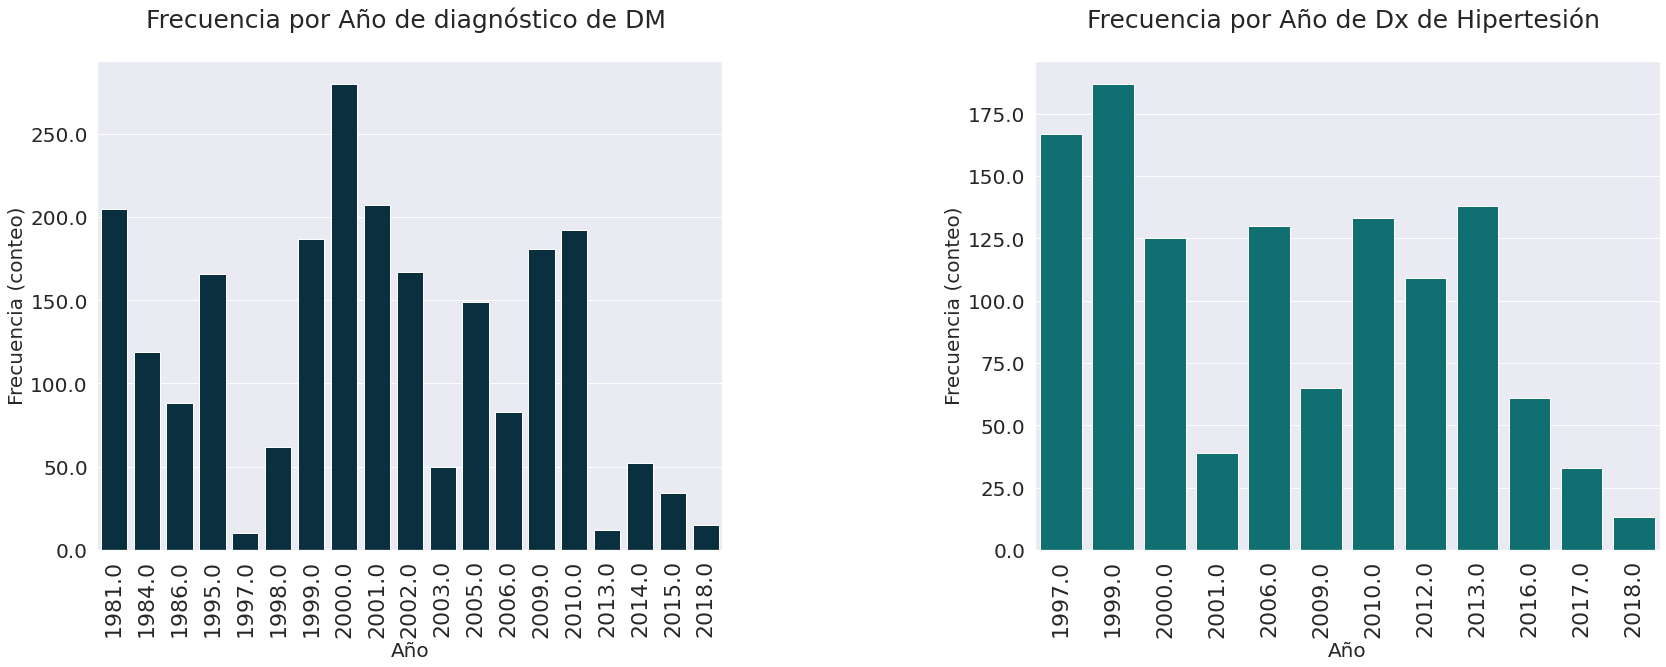

In [20]:
order = df['año_dx_dm'].sort_values().unique()
order = order[~pd.isnull(order)]

sns.set(font_scale = 2)
f, axes = plt.subplots(1, 2, figsize=(28, 9), gridspec_kw={'hspace': 1, 'wspace': 0.5})
g1 = sns.countplot(df["año_dx_dm"], order= order, ax=axes[0], color="#023246")
g1.axes.set_title("Frecuencia por Año de diagnóstico de DM \n",fontsize=25)
g1.set_xlabel("Año",fontsize=20)
g1.set_ylabel("Frecuencia (conteo)",fontsize=20)
g1.set_yticklabels(g1.get_yticks(), size = 20)              
g1.set_xticklabels(g1.get_xticklabels(),rotation = 90)

order = df['año_dx_hta'].sort_values().unique()
order = order[~pd.isnull(order)]

g2 = sns.countplot(df["año_dx_hta"], order= order, ax=axes[1], color="#008081")
g2.axes.set_title("Frecuencia por Año de Dx de Hipertesión \n",fontsize=25)
g2.set_xlabel("Año",fontsize=20)
aux = g2.set_ylabel("Frecuencia (conteo)",fontsize=20)
g2.set_yticklabels(g2.get_yticks(), size = 20)    
g2.set_xticklabels(g2.get_xticklabels(),rotation = 90)
print("")

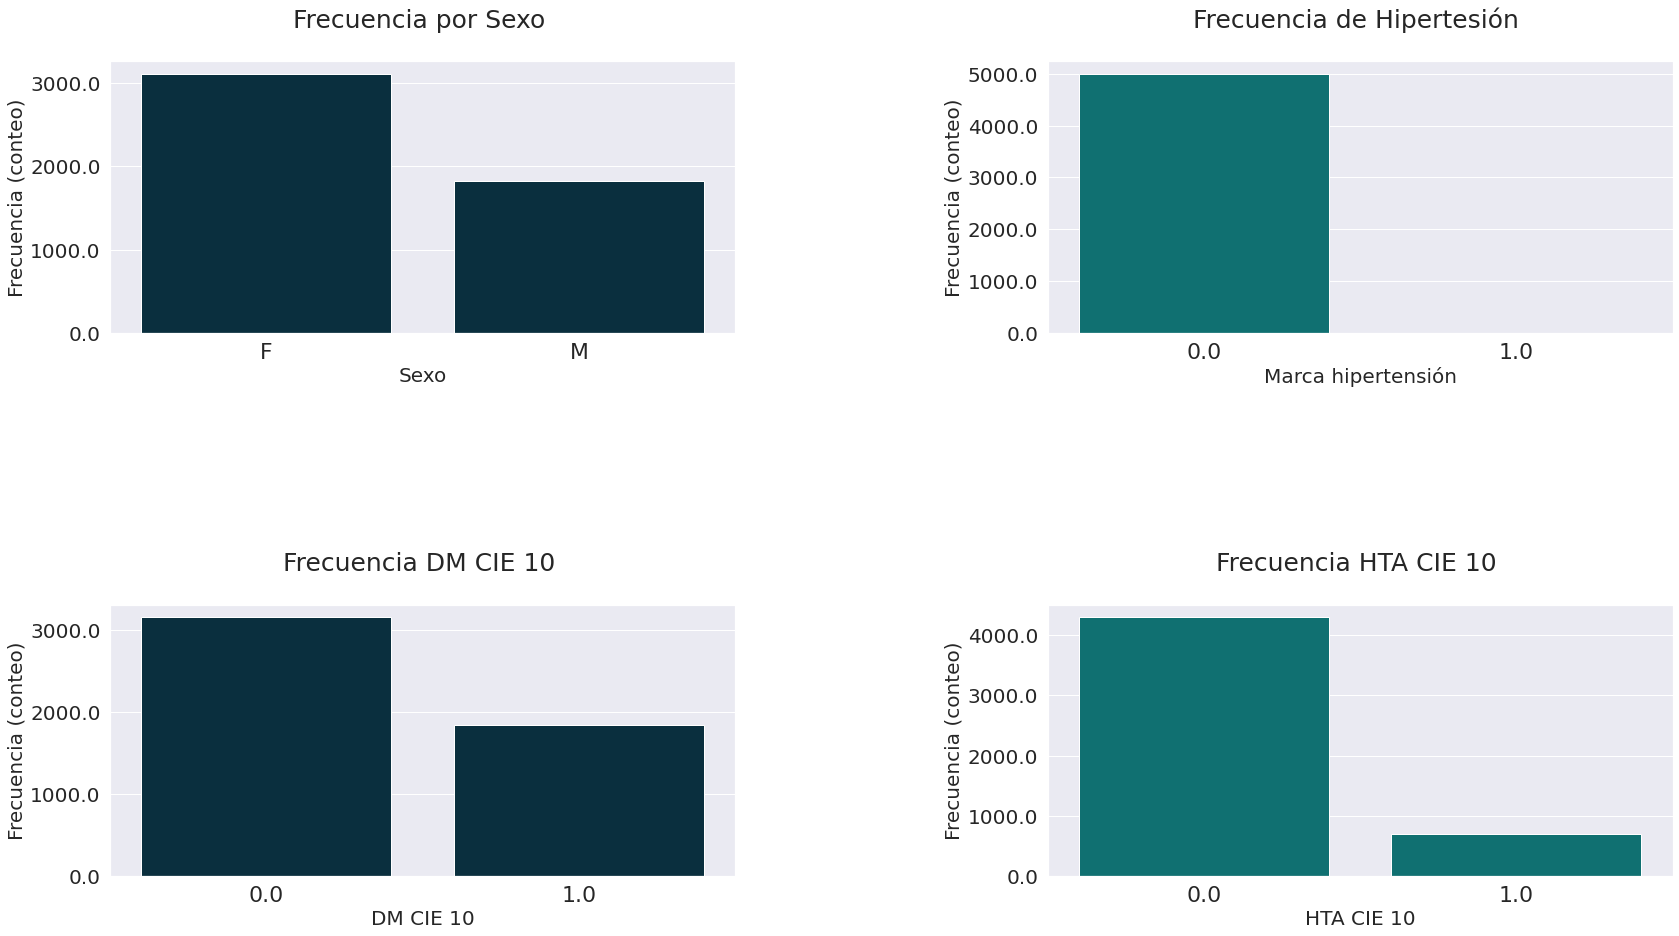

In [21]:
sns.set(font_scale = 2)
f, axes = plt.subplots(2, 2, figsize=(28, 15), gridspec_kw={'hspace': 1, 'wspace': 0.5})

g1 = sns.countplot(df_aux["sexo"], ax=axes[0,0], color="#023246")
g1.axes.set_title("Frecuencia por Sexo \n",fontsize=25)
g1.set_xlabel("Sexo",fontsize=20)
g1.set_ylabel("Frecuencia (conteo)",fontsize=20)
g1.set_yticklabels(g1.get_yticks(), size = 20)              
#g1.set_xticklabels(g1.get_xticklabels(),rotation = 90)

g2 = sns.countplot(df_aux["hta"], ax=axes[0,1], color="#008081")
g2.axes.set_title("Frecuencia de Hipertesión \n",fontsize=25)
g2.set_xlabel("Marca hipertensión",fontsize=20)
g2.set_ylabel("Frecuencia (conteo)",fontsize=20)
g2.set_yticklabels(g2.get_yticks(), size = 20)    
#g2.set_xticklabels(g2.get_xticklabels(),rotation = 90)

g3 = sns.countplot(df_aux["dm_cie"], ax=axes[1,0], color="#023246")
g3.axes.set_title("Frecuencia DM CIE 10 \n",fontsize=25)
g3.set_xlabel("DM CIE 10",fontsize=20)
g3.set_ylabel("Frecuencia (conteo)",fontsize=20)
g3.set_yticklabels(g3.get_yticks(), size = 20)              
#g3.set_xticklabels(g3.get_xticklabels(),rotation = 90)

g4 = sns.countplot(df_aux["hta_cie"], ax=axes[1,1], color="#008081")
g4.axes.set_title("Frecuencia HTA CIE 10 \n",fontsize=25)
g4.set_xlabel("HTA CIE 10",fontsize=20)
g4.set_ylabel("Frecuencia (conteo)",fontsize=20)
g4.set_yticklabels(g4.get_yticks(), size = 20)    
#g4.set_xticklabels(g4.get_xticklabels(),rotation = 90)

print("")

<Figure size 4000x4000 with 0 Axes>

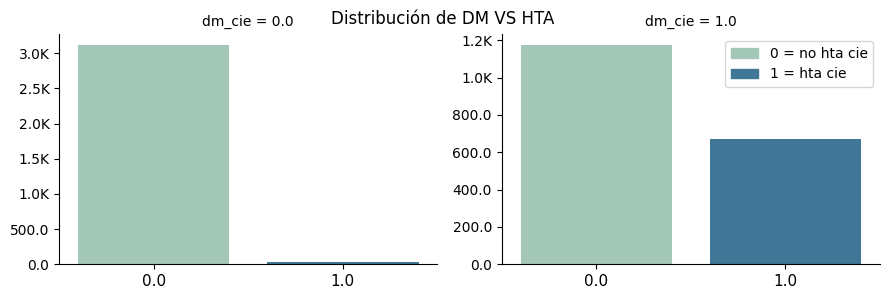

In [22]:
sns.reset_defaults()
dm_hta = df_aux.groupby(['dm_cie', 'hta_cie'],
                          as_index=False)['newid']\
                          .count()\
                          .rename(columns={'newid': 'registros'})

fig = plt.figure(figsize=(40,40))
colors = ['#9ECEB8', '#327BA4']# colores de 'YlGnBu'

a = sns.FacetGrid(data=dm_hta, col='dm_cie', col_wrap=2, sharex=False, sharey=False,
                 aspect=1.5)
a.map_dataframe(sns.barplot, x='hta_cie', y='registros', palette = colors)
for ax in a.axes.flat:
    for label in ax.get_xticklabels():
        label.set_size(11)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.number_formatter))
        a.fig.tight_layout()
    
plt.subplots_adjust(top=0.9)

aux = a.fig.suptitle("Distribución de DM VS HTA \n \n \n", fontsize=12)


# The color cycles are going to all the same, doesn't matter which axes we use
Ax = a.axes[0]


# Some how for a plot of 5 bars, there are 6 patches, what is the 6th one?
Boxes = [item for item in Ax.get_children()
         if isinstance(item, matplotlib.patches.Rectangle)][:-1]

# There is no labels, need to define the labels
legend_labels  = ['0 = no hta cie', '1 = hta cie']

# Create the legend patches
legend_patches = [matplotlib.patches.Patch(color=C, label=L) for
                  C, L in zip([item.get_facecolor() for item in Boxes],
                              legend_labels)]

# Plot the legend
plt.legend(handles=legend_patches)

**Covariables**

In [23]:
corr = df.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

,colesterol,trigliceridos,hdl,ldl,hba1c,plaquetas,creatinina,acido_urico,urea,peso,altura,tfg,imc,in_consulta,sistolica,diastolica,glucosa1,glucosa2,edad,dif_date_lab,dif_date_lab_from_ini,occurance_counter,año_dx_dm,año_dx_hta,year_consulta
colesterol,1.00,0.29,0.24,0.44,0.15,0.08,-0.09,0.11,-0.23,-0.14,-0.15,-0.11,-0.15,-0.19,-0.05,0.03,-0.20,nan,0.22,0.24,-0.13,0.05,0.13,0.11,-0.25
trigliceridos,0.29,1.00,-0.34,-0.24,-0.03,0.02,0.05,0.11,0.15,-0.01,-0.23,-0.22,0.14,-0.15,-0.02,-0.06,0.45,nan,-0.24,0.29,0.03,0.02,-0.16,-0.25,-0.12
hdl,0.24,-0.34,1.00,0.50,-0.09,0.67,0.66,0.03,-0.23,0.18,0.21,-0.46,0.10,-0.01,0.11,0.09,-0.25,nan,-0.11,0.05,0.12,nan,0.05,0.76,-0.10
ldl,0.44,-0.24,0.50,1.00,0.30,-0.09,0.10,-0.11,0.97,0.38,0.40,-0.20,-0.18,-0.11,0.02,-0.17,0.07,nan,0.15,0.14,0.32,nan,0.06,0.39,-0.21
hba1c,0.15,-0.03,-0.09,0.30,1.00,-0.54,0.47,-0.55,0.63,0.02,-0.16,-0.49,-0.13,-0.15,0.11,0.09,0.67,nan,0.03,0.01,0.15,0.10,0.18,0.14,-0.03
plaquetas,0.08,0.02,0.67,-0.09,-0.54,1.00,-0.01,0.31,0.27,0.08,0.11,-0.48,0.27,0.10,0.05,0.06,0.05,nan,-0.16,-0.14,0.12,nan,-0.24,0.55,-0.02
creatinina,-0.09,0.05,0.66,0.10,0.47,-0.01,1.00,-0.22,0.20,0.08,0.01,-0.33,0.09,0.05,0.01,-0.05,0.16,nan,-0.10,0.32,0.15,nan,-0.32,-0.00,-0.09
acido_urico,0.11,0.11,0.03,-0.11,-0.55,0.31,-0.22,1.00,-0.19,-0.13,0.12,-0.34,0.24,-0.27,0.07,0.11,-0.14,nan,0.34,0.09,-0.28,nan,0.34,-0.11,-0.21
urea,-0.23,0.15,-0.23,0.97,0.63,0.27,0.20,-0.19,1.00,0.29,0.44,-0.77,-0.26,0.22,0.05,-0.13,-0.14,nan,0.05,0.23,0.65,nan,-0.08,0.26,-0.01
peso,-0.14,-0.01,0.18,0.38,0.02,0.08,0.08,-0.13,0.29,1.00,0.51,0.41,0.65,0.03,0.09,0.13,0.07,nan,-0.18,-0.02,0.02,-0.09,-0.08,0.22,-0.01


**Edad primera toma presión arterial**

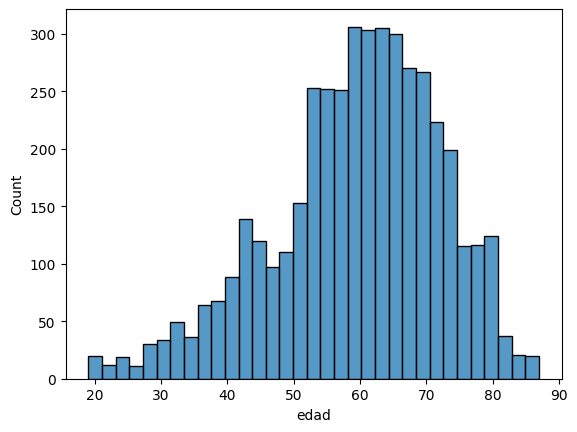

In [24]:
df_pru = df[(~df['sistolica'].isnull()) & (df.sistolica != 0) &
       (~df['diastolica'].isnull()) & (df.diastolica != 0) & (~df['edad'].isnull())]\
      [['newid','sistolica','diastolica','edad','fecha_consulta']].sort_values('newid')
sns.histplot(data=df_pru.groupby(["newid", "edad"])["fecha_consulta"].first(), x="edad")
plt.show()

**Edad presión primera presión arterial alta**

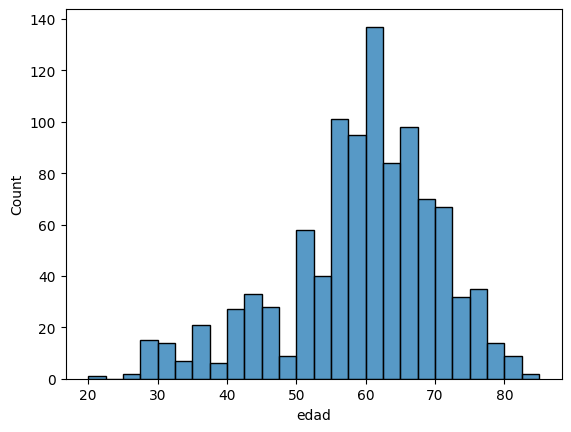

In [25]:
df_pru = df[(df.sistolica >= 130) & (df.diastolica >= 80) & (~df['edad'].isnull())]\
      [['newid','sistolica','diastolica','edad','fecha_consulta']].sort_values('newid')
sns.histplot(data=df_pru.groupby(["newid", "edad"])["fecha_consulta"].first(), x="edad")
plt.show()